In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd
import seaborn as sns
import re
from scipy import stats

In [2]:
# RMSDFlow location
RMSDFLOW_HOME = "/data/share/exchange/CB/ChemFlow/RMSDFlow"

# Parameters

In [3]:
# Number of molecules to consider as "best"
top = 25

## Path

In [4]:
# Path to main folder
path = "/data/share/exchange/CB/hivpr_DUD"

# Search for all files in path, restrict to directories, print the directory's names
ligand_list = ! ls -l {path}/output/VS/ | grep "^d" | awk '{{print $$9}}'

# create a folder to contain graphs
save_folder = "{}/output/ReportFlow/".format(path)
! mkdir -p $save_folder

## Colors

In [5]:
# Define the color palette used for plotting :
color_list = sns.husl_palette(len(ligand_list),0,0.8,0.65)

color_dic = {}
for i,lig in enumerate(ligand_list):
    color_dic[lig] = color_list[i]

# Set the new custom color list
sns.set_palette(color_list)

***

# <span style="color:red">DockFlow</span>

## PLANTS

### Read VS results

In [6]:
# Read scores
plants_scores = pd.DataFrame()

for i,ligand in enumerate(ligand_list):
    path2file = '{}/output/VS/{}/docking/ranking.csv'.format(path, ligand)
    temp = pd.read_csv(path2file, header=0)
    temp['LIGAND'] = ligand
    plants_scores = plants_scores.append(temp)

plants_scores.rename(columns = {'TOTAL_SCORE' : 'PLANTS_SCORE', 'LIGAND_ENTRY' : 'POSE'}, inplace=True)
plants_scores = plants_scores[['LIGAND','POSE','PLANTS_SCORE']]
plants_scores.reset_index(inplace=True, drop=True)

In [7]:
# Show all results
plants_scores.loc[plants_scores['LIGAND'] == 'hivpr_ligands']

,LIGAND,POSE,PLANTS_SCORE
61140,hivpr_ligands,ZINC01484895_entry_00001_conf_01,-81.4737
61141,hivpr_ligands,ZINC01484895_entry_00001_conf_02,-80.4540
61142,hivpr_ligands,ZINC01484895_entry_00001_conf_03,-78.9472
61143,hivpr_ligands,ZINC01484895_entry_00001_conf_04,-76.9096
61144,hivpr_ligands,ZINC01484895_entry_00001_conf_05,-76.6207
61145,hivpr_ligands,ZINC01484895_entry_00001_conf_06,-76.5064
61146,hivpr_ligands,ZINC01484895_entry_00001_conf_07,-74.6994
61147,hivpr_ligands,ZINC01484895_entry_00001_conf_08,-74.3544
61148,hivpr_ligands,ZINC01484895_entry_00001_conf_09,-73.4017
61149,hivpr_ligands,ZINC01484895_entry_00001_conf_10,-73.1575


### Sort by docking score and show the top results

In [8]:
plants_scores_sorted = plants_scores.sort_values(['PLANTS_SCORE']).reset_index(drop=True)
plants_scores_sorted.head(top)

,LIGAND,POSE,PLANTS_SCORE
0,decoys_341_425,ZINC01058148_entry_00056_conf_01,-114.482
1,decoys_341_425,ZINC01058148_entry_00056_conf_02,-114.289
2,decoys_341_425,ZINC00934006_entry_00012_conf_01,-113.747
3,decoys_341_425,ZINC00934007_entry_00013_conf_01,-113.654
4,decoys_341_425,ZINC01058143_entry_00054_conf_01,-113.435
5,decoys_341_425,ZINC00933999_entry_00010_conf_01,-112.737
6,decoys_256_340,ZINC00918434_entry_00038_conf_01,-112.616
7,decoys_1446_1530,ZINC03778216_entry_00009_conf_01,-112.599
8,hivpr_ligands,ZINC03833858_entry_00059_conf_01,-112.580
9,decoys_256_340,ZINC00918434_entry_00039_conf_01,-112.575


In [ ]:
plt.close()

plt.figure(figsize=(15,10))
ax=plt.gca()
poses_list = list(reversed(plants_scores_sorted['POSE'].unique()))
    
for i,pose in enumerate(poses_list):
    x = plants_scores_sorted.loc[plants_scores_sorted['POSE'] == pose]['PLANTS_SCORE'].values[0]
    label = plants_scores_sorted.loc[plants_scores_sorted['POSE'] == pose]['POSE'].values[0]
    ligand = plants_scores_sorted.loc[plants_scores_sorted['POSE'] == pose]['LIGAND'].values[0]
    g = ax.barh(i, x,
                linewidth=0,
                color=color_dic[ligand])

yhandles = list(reversed(range(len(poses_list))))
plt.yticks(yhandles, poses_list, size=14)
plt.xticks(size=14)
plt.title('Docking poses sorted by score, colored by ligand for the top {}'.format(top), size=18)

legend_list = []
for lig in color_dic:
    legend_list.append(mpatches.Patch(color=color_dic[lig], label=lig))
plt.legend(bbox_to_anchor=(0, 0), loc='best', ncol=1, handles=legend_list, prop={'size':14})
plt.annotate('{} :'.format('Ligand'), xy=(-0.08,0), xycoords='axes fraction', size=15)

plt.savefig('{}/PLANTS_sorted.png'.format(save_folder), format='png', dpi=200,bbox_inches='tight')
plt.show()

### Get the best pose per ligand

In [9]:
best_poses = pd.DataFrame()
for ligand in ligand_list:
    best_poses = pd.concat([best_poses,plants_scores.loc[plants_scores['LIGAND'] == ligand].head(1)])
best_poses

,LIGAND,POSE,PLANTS_SCORE
0,decoys_1021_1105,ZINC02617749_entry_00001_conf_01,-97.5108
2550,decoys_1106_1190,ZINC02779535_entry_00001_conf_01,-73.6678
5100,decoys_1191_1275,ZINC02964333_entry_00001_conf_01,-96.6546
7650,decoys_1276_1360,ZINC03236709_entry_00001_conf_01,-92.4895
10200,decoys_1361_1445,ZINC03359437_entry_00001_conf_01,-92.0345
12750,decoys_1446_1530,ZINC03632731_entry_00001_conf_01,-84.5603
15300,decoys_1531_1615,ZINC03855497_entry_00001_conf_01,-68.9332
17850,decoys_1616_1700,ZINC03892860_entry_00001_conf_01,-62.2250
20400,decoys_1701_1785,ZINC03968977_entry_00001_conf_01,-70.7306
22950,decoys_171_255,ZINC00764228_entry_00001_conf_01,-102.6300


### Show ligands structures

In [12]:
# To be implemented

## Other docking softwares

***

# <span style="color:green">ScoreFlow</span>

## Rescore X-ray structure(s)

In [13]:
complex_list = ! cd $path/com/; ls | grep ".pdb$" | sed s/.pdb//g

In [14]:
plants_crystal_rescores = pd.DataFrame()

for i,com in enumerate(complex_list):
    path2file = '{}/output/rescoring/{}/results/ranking.csv'.format(path, com)
    temp = pd.read_csv(path2file, header=0)
    temp['COMPLEX'] = com
    ligand = ! cd $path/output/rescoring/$com/; ls *.mol2 | sed s/.mol2//g | grep -v -e "water" -e "protein" -e "bad"
    temp['LIGAND'] = ligand
    plants_crystal_rescores = plants_crystal_rescores.append(temp)

plants_crystal_rescores.rename(columns = {'TOTAL_SCORE' : 'PLANTS_SCORE'}, inplace=True)
plants_crystal_rescores = plants_crystal_rescores[['COMPLEX', 'LIGAND', 'PLANTS_SCORE']]
plants_crystal_rescores.reset_index(inplace=True, drop=True)

In [15]:
plants_crystal_rescores

,COMPLEX,LIGAND,PLANTS_SCORE
0,1hvj,ligand_A78800_0,-135.265
1,1hvr,ligand_XK2263_0,-139.479
2,1hvs,ligand_A77800_0,-116.274
3,4phv,ligand_VAC100_0,-134.137
4,9hvp,ligand_0E9100_0,-111.379


### Link complex and VS results with <span style="color:blue">RMSDFlow</span>

In [16]:
%%capture
# Hides output from rmsd function

# Compute RMSD with Hungarian Algorithm
plants_rmsd = pd.DataFrame()

for com in complex_list:
    lig = ! cd $path/output/rescoring/$com/; ls *.mol2 | sed s/.mol2//g | grep -v -e "water" -e "protein" -e "bad"
    lig = ' '.join(lig)
    ref = "{}/output/rescoring/{}/{}.mol2".format(path,com,lig)
    # Make list of ligands
    input_list = ! ls $path/output/VS/$lig/docking/*ligand*.mol2
    input_list = ' '.join(input_list)
    
    # Create directory for results
    ! mkdir -p $path/output/rmsd/$com/
    output_name = "{}/output/rmsd/{}/rmsd.csv".format(path, com)
    ! rm -f $output_name
    ! $RMSDFLOW_HOME/rmsd.py -r $ref -i $input_list -a ha -s -o $output_name
    temp = pd.read_csv(output_name)
    plants_rmsd = pd.concat([plants_rmsd,temp])

plants_rmsd = plants_rmsd.drop(['Number of atoms read', 'Number of atoms in molecule'], axis=1)
plants_rmsd.reset_index(inplace=True, drop=True)
plants_rmsd.rename(columns = {'Reference' : 'LIGAND', 'Input' : 'POSE'}, inplace=True)

In [17]:
plants_merged = pd.merge(plants_rmsd, plants_scores, how='inner', on=['LIGAND','POSE'])
plants_merged

,LIGAND,POSE,RMSD,PLANTS_SCORE
0,ligand_A78800_0,1hvj_ligand_0_entry_00001_conf_01,5.102447,-124.049
1,ligand_A78800_0,1hvj_ligand_0_entry_00001_conf_02,5.528226,-121.780
2,ligand_A78800_0,1hvj_ligand_0_entry_00001_conf_03,4.627680,-120.447
3,ligand_A78800_0,1hvj_ligand_0_entry_00001_conf_04,5.712425,-119.407
4,ligand_A78800_0,1hvj_ligand_0_entry_00001_conf_05,5.465150,-117.834
5,ligand_XK2263_0,1hvr_ligand_0_entry_00001_conf_01,0.617182,-150.477
6,ligand_XK2263_0,1hvr_ligand_0_entry_00001_conf_02,0.643073,-150.248
7,ligand_XK2263_0,1hvr_ligand_0_entry_00001_conf_03,1.270743,-115.809
8,ligand_XK2263_0,1hvr_ligand_0_entry_00001_conf_04,1.884214,-115.014
9,ligand_XK2263_0,1hvr_ligand_0_entry_00001_conf_05,1.931165,-111.865


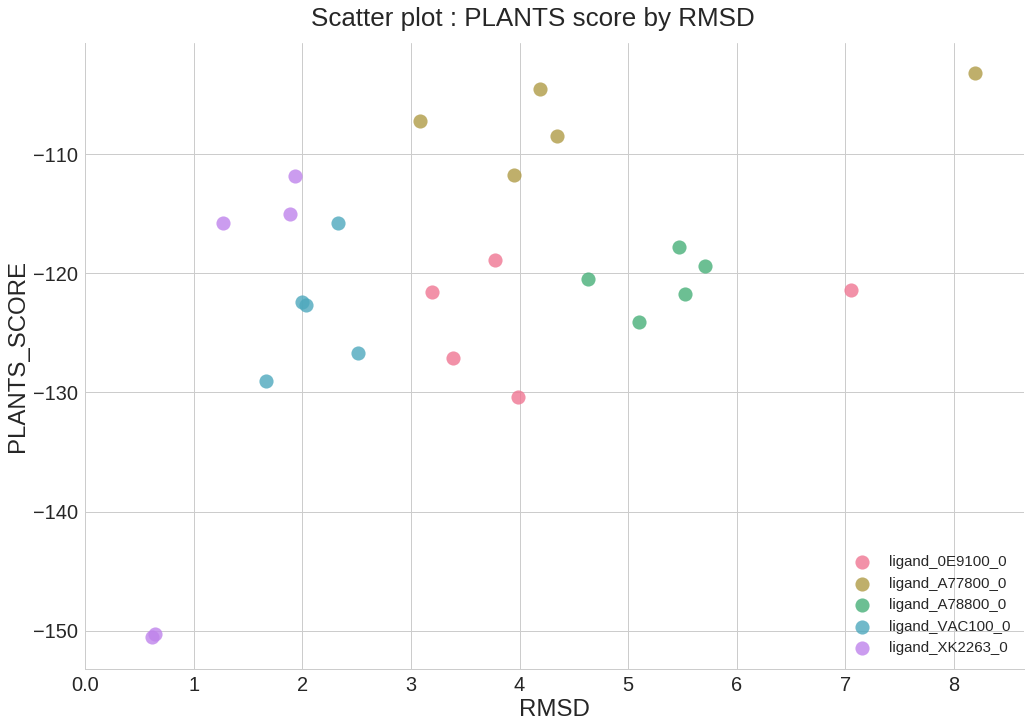

In [69]:
plt.close()

sns.set_style("whitegrid")
g = sns.lmplot(x="RMSD", y="PLANTS_SCORE", data=plants_merged, hue="LIGAND", hue_order=ligand_list, size=10, aspect=1.4, fit_reg=False,
              scatter_kws={"s": 200}, legend=False)

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Scatter plot : PLANTS score by RMSD', size=26)
g.set_ylabels(size=24)
g.set_xticklabels(size=20)
g.set_yticklabels(size=20)
g.set_xlabels(size=24)

# set limits auto
plt.gca().set_xlim(left=0)

plt.legend(loc='lower right', ncol=1, prop={'size':15})

plt.savefig('{}/PLANTS_RMSD_scatter_all.png'.format(save_folder), format='png', dpi=200,bbox_inches='tight')
plt.show()

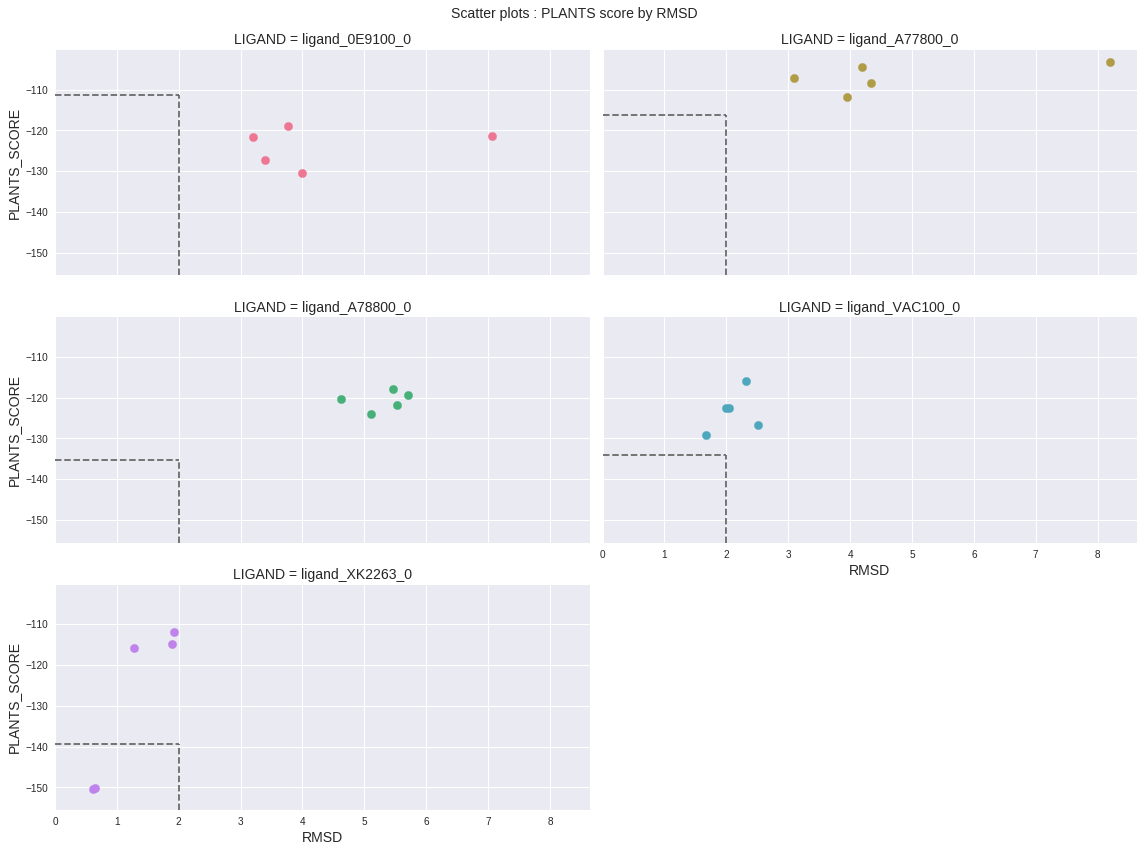

In [62]:
# Individual scatter plots
plt.close()

# Plot
g = sns.FacetGrid(plants_merged, col="LIGAND", hue="LIGAND", hue_order=ligand_list, col_order=ligand_list, 
                  col_wrap=2, size=4, aspect=2)
g.map(plt.scatter, "RMSD", "PLANTS_SCORE", s=70)

ymin = plants_merged['PLANTS_SCORE'].min()-5

# Add horizontal line for crystal
for ax in g.axes.flat:
    lig = ax.get_title().lstrip('LIGAND = ')
    score = float(plants_crystal_rescores.loc[plants_crystal_rescores['LIGAND'] == lig]["PLANTS_SCORE"].values)
    ax.plot((0, 2), (score, score), c=".4", ls="--")
    ax.plot((2, 2), (ymin, score), c=".4", ls="--")

# Add title to graph
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Scatter plots : PLANTS score by RMSD', size=14)
g.set_ylabels(size=14)
g.set_xlabels(size=14)
g.set_titles(size=14)

# set limits auto
plotax = plt.gca()
plotax.set_xlim(left=0)
plotax.set_ylim(bottom=ymin)

plt.savefig('{}/PLANTS_RMSD_scatter.png'.format(save_folder), format='png', dpi=200,bbox_inches='tight')
plt.show()

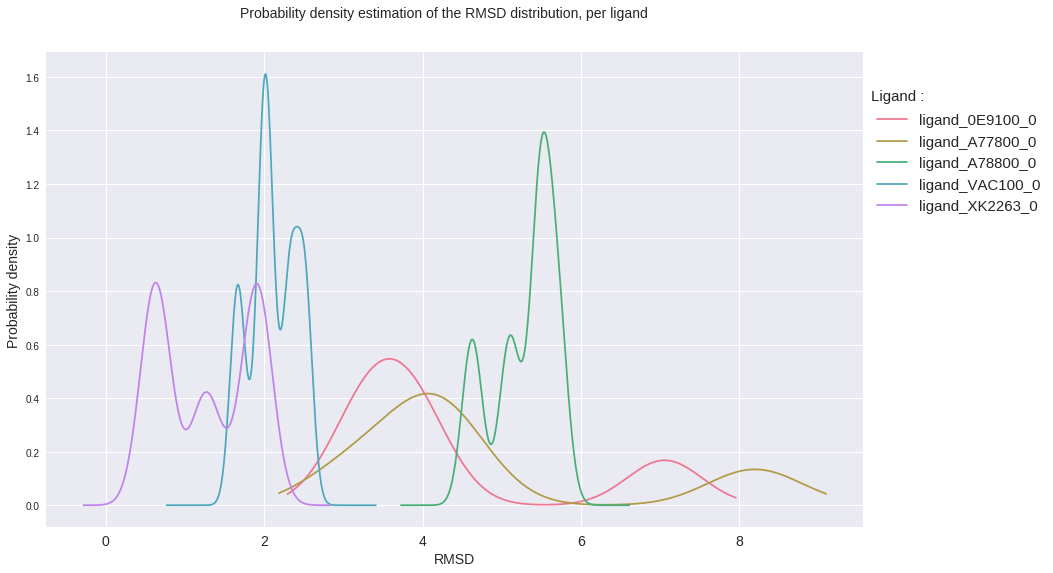

In [19]:
plt.close()
    
g = sns.FacetGrid(data=plants_merged, hue='LIGAND', hue_order=ligand_list, aspect=1.5, size=8)
g.map(sns.kdeplot,'RMSD',bw=0.30,gridsize=300 )

ax = plt.gca()
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left', ncol=1, prop={'size':15})
plt.annotate('{} :'.format('Ligand'), xy=(1.01,0.9), xycoords='axes fraction', size=15)

# Add title and label
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Probability density estimation of the RMSD distribution, per ligand', size=14)
g.set_ylabels('Probability density', size=14)
g.set_xlabels(size=14)
g.set_xticklabels(size=14)

ax = plt.gca()
plt.savefig('{}/PLANTS_RMSD_distribution.png'.format(save_folder), format='png', dpi=200,bbox_inches='tight')

plt.show()

## Rescore docking poses

In [20]:
plants_rescores = pd.DataFrame()

# retrieve the scoring function used from the config file
method_from_config = ! grep "scoring_function=" $path/ScoreFlow.config
method_name = '{}_SCORE'.format(''.join(method_from_config).lstrip('scoring_function="').rstrip('"').upper())

for i,ligand in enumerate(ligand_list):
    docking_pose_list = ! ls $path/output/rescoring/$ligand/
    for pose in docking_pose_list:
        path2file = '{}/output/rescoring/{}/{}/results/ranking.csv'.format(path, ligand, pose)
        temp = pd.read_csv(path2file, header=0)
        temp['LIGAND'] = ligand
        temp['POSE'] = pose
        plants_rescores = plants_rescores.append(temp)

plants_rescores.rename(columns = {'TOTAL_SCORE' : method_name}, inplace=True)
plants_rescores = plants_rescores[['LIGAND','POSE',method_name]]
plants_rescores.reset_index(inplace=True, drop=True)

In [21]:
rescored_merged =  pd.merge(plants_scores, plants_rescores, how='inner', on=['LIGAND','POSE'])
rescored_merged = rescored_merged.sort_values('PLANTS_SCORE')
rescored_merged.reset_index(inplace=True, drop=True)
rescored_merged

,LIGAND,POSE,PLANTS_SCORE,PLP_SCORE
0,ligand_XK2263_0,1hvr_ligand_0_entry_00001_conf_01,-150.477,-142.4620
1,ligand_XK2263_0,1hvr_ligand_0_entry_00001_conf_02,-150.248,-142.2040
2,ligand_0E9100_0,9hvp_ligand_0_entry_00001_conf_01,-130.420,-129.2860
3,ligand_VAC100_0,4phv_ligand_0_entry_00001_conf_01,-129.028,-124.0830
4,ligand_0E9100_0,9hvp_ligand_0_entry_00001_conf_02,-127.126,-124.2170
5,ligand_VAC100_0,4phv_ligand_0_entry_00001_conf_02,-126.704,-119.2970
6,ligand_A78800_0,1hvj_ligand_0_entry_00001_conf_01,-124.049,-121.3620
7,ligand_VAC100_0,4phv_ligand_0_entry_00001_conf_03,-122.630,-118.6930
8,ligand_VAC100_0,4phv_ligand_0_entry_00001_conf_04,-122.441,-116.0560
9,ligand_A78800_0,1hvj_ligand_0_entry_00001_conf_02,-121.780,-116.1280


In [56]:
rescored_merged_rmsd =  pd.merge(plants_merged, plants_rescores, how='inner', on=['LIGAND','POSE'])
rescored_merged_rmsd = rescored_merged_rmsd.sort_values('PLANTS_SCORE')
rescored_merged_rmsd.reset_index(inplace=True, drop=True)
rescored_merged_rmsd

,LIGAND,POSE,RMSD,PLANTS_SCORE,PLP_SCORE
0,ligand_XK2263_0,1hvr_ligand_0_entry_00001_conf_01,0.617182,-150.477,-142.4620
1,ligand_XK2263_0,1hvr_ligand_0_entry_00001_conf_02,0.643073,-150.248,-142.2040
2,ligand_0E9100_0,9hvp_ligand_0_entry_00001_conf_01,3.985390,-130.420,-129.2860
3,ligand_VAC100_0,4phv_ligand_0_entry_00001_conf_01,1.668649,-129.028,-124.0830
4,ligand_0E9100_0,9hvp_ligand_0_entry_00001_conf_02,3.388436,-127.126,-124.2170
5,ligand_VAC100_0,4phv_ligand_0_entry_00001_conf_02,2.510819,-126.704,-119.2970
6,ligand_A78800_0,1hvj_ligand_0_entry_00001_conf_01,5.102447,-124.049,-121.3620
7,ligand_VAC100_0,4phv_ligand_0_entry_00001_conf_03,2.037271,-122.630,-118.6930
8,ligand_VAC100_0,4phv_ligand_0_entry_00001_conf_04,1.995999,-122.441,-116.0560
9,ligand_A78800_0,1hvj_ligand_0_entry_00001_conf_02,5.528226,-121.780,-116.1280


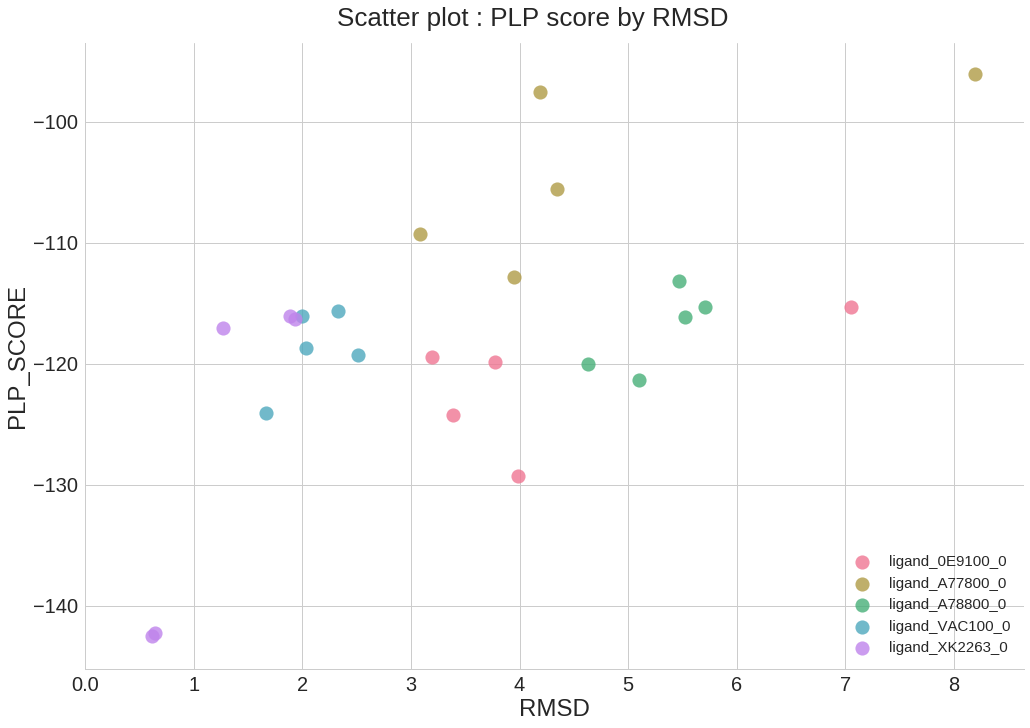

In [70]:
plt.close()
sns.set_style("whitegrid")

g = sns.lmplot(x="RMSD", y="PLP_SCORE", data=rescored_merged_rmsd, hue="LIGAND", hue_order=ligand_list, size=10, aspect=1.4, fit_reg=False,
              scatter_kws={"s": 200}, legend=False)

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Scatter plot : PLP score by RMSD', size=26)
g.set_ylabels(size=24)
g.set_xticklabels(size=20)
g.set_yticklabels(size=20)
g.set_xlabels(size=24)

# set limits auto
plt.gca().set_xlim(left=0)

plt.legend(loc='lower right', ncol=1, prop={'size':15})

plt.savefig('{}/rescored_RMSD_scatter_all.png'.format(save_folder), format='png', dpi=200,bbox_inches='tight')
plt.show()

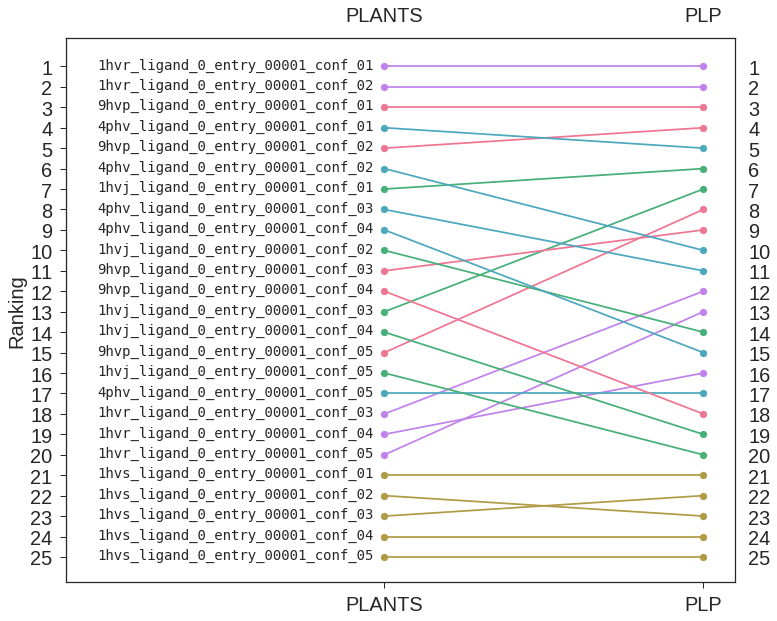

In [88]:
plt.close()
plt.figure(figsize=(12,10))

sns.set_style("ticks")

method_list = ['PLANTS_SCORE', method_name]

rescored_melted = pd.DataFrame()
for i, method in enumerate(method_list):
    name = method.replace("_SCORE",'')
    temp = pd.DataFrame([rescored_merged['LIGAND'],rescored_merged['POSE'],rescored_merged[method]]).transpose()
    temp.columns = ['LIGAND', 'POSE', 'SCORE']
    temp['METHOD'] = name
    rescored_melted = pd.concat([rescored_melted, temp])

method_list = rescored_melted['METHOD'].unique()

for j,pose in enumerate(poses_list):
    for i,method in enumerate(method_list):
        x = i-1
        temp = rescored_melted.loc[(rescored_melted['METHOD'] == method)].sort_values('SCORE').reset_index()
        y = -temp.loc[temp['POSE'] == pose].index
        ligand = temp.loc[temp['POSE'] == pose]['LIGAND'].values[0]
        plt.scatter(x=x, y=y, label=pose, c=color_dic[ligand])
        if method == method_list[0]:
            ylabel = y.values[0]
            lab = '{: >11}'.format(pose)
            plt.annotate(lab, xy=(-1.9,ylabel-0.1), xycoords='data', size=14, family='monospace')
            coordy = y
            coordx = x
        elif method == method_list[-1]:
            plt.plot([coordx,x],[coordy,y],c=color_dic[ligand])
            ylabel = y.values[0]
            lab = '{: <11}'.format(pose)
            #plt.annotate(lab, xy=(1.2,ylabel-0.1), xycoords='data', size=14, family='monospace')
        else:
            plt.plot([coordx,x],[coordy,y],c=color_dic[ligand])
            coordy = y
            coordx = x

ax=plt.gca()
ax.set_xlim([-2,0.1])

plt.xticks([-1,0], rescored_melted['METHOD'].unique(), size=20)   
plt.yticks([-i for i in range(len(temp))], [i+1 for i in range(len(temp))], size=20)
plt.tick_params(labeltop=True, labelright=True)
plt.ylabel('Ranking', size=20)

legend_list = []
for lig in color_dic:
    legend_list.append(mlines.Line2D(range(1), range(1), marker='o', markersize=16, color=color_dic[lig], label=lig))
#plt.legend(bbox_to_anchor=(-0.05, 1), loc='best', ncol=1, handles=legend_list, prop={'size':20})
#plt.annotate('{} :'.format('Ligand'), xy=(-0.15,1), xycoords='axes fraction', size=20)

plt.savefig('{}/rescored_ranking.png'.format(save_folder), format='png', dpi=200,bbox_inches='tight')
plt.show()

***